In [22]:
proj_dir = "/master/nplatt/sch_hae_scan"
results_dir = f"{proj_dir}/results"

In [23]:
Path(f"{results_dir}/pub_figs").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/pub_figs")

# MAP

In [24]:
Path(f"{results_dir}/pub_figs/fig1").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/pub_figs/fig1")

In [25]:
info_df = pd.read_csv(
    f"{proj_dir}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv", sep=","
)

In [59]:
# these are samples that passed filtering...need to do after initial pca
pca_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")

In [60]:
df = pca_df[["sample_name", "lat", "lon", "pca_species", "country"]]

In [62]:
sh_df = df.loc[df["pca_species"] == "s_haematobium"]
sb_df = df.loc[df["pca_species"] == "s_bovis"]

In [63]:
missing = set(sh_df[sh_df["lat"].isna()]["country"].unique())

In [64]:
present = set(sh_df[~sh_df["lat"].isna()]["country"].unique())

In [65]:
missing.difference(present)

{'cameroon',
 'egypt',
 'gambia',
 'guineabissau',
 'kenya',
 'liberia',
 'mali',
 'senegal'}

In [66]:
cameroon = [5.359846821839579, 12.83241583754397]
egypt = [26.79051859746806, 29.75135994720815]
gambia = [13.417174078240578, -15.468365084085413]
guineabissau = [12.217389596231383, -13.622661452252528]
kenya = [-0.0375919952015787, 35.50819643080273]
liberia = [6.3216131811123155, -8.65684105409062]
mali = [18.110125425188524, -2.108990737257369]
senegal = [14.525930151908192, -14.413677237868546]

In [67]:
# set marker shapes based on PRESUMED species
markers = {
    "s_haematobium": "o",
    "s_sp": "v",
    "s_bovis": "X",
    "s_intercalatum": "*",
    "s_guineensis": "P",
    "s_margrebowiei": "D",
    "s_matthei": "s",
}

In [68]:
# Path to the countries shapefile from Natural Earth
countries_shp = (
    "/master/nplatt/sch_hae_scan/results/sampling_maps/ne_110m_admin_0_countries.shp"
)

cartopy_shading = {
    "Angola": "#FF0000",
    "Kingdom of eSwatini": "#FF1C00",
    "Ethiopia": "#FF3800",
    "Kenya": "#FF5500",
    "Madagascar": "#FF7100",
    "Namibia": "#FF8D00",
    "Tanzania": "#FFAA00",
    "Uganda": "#FFC600",
    "Zambia": "#FFE200",
    "Cameroon": "#0000FF",
    "Côte d'Ivoire": "#0019E5",
    "Egypt": "#0033CC",
    "The Gambia": "#004CB2",
    "Guinea-Bissau": "#006699",
    "Liberia": "#007F7F",
    "Mali": "#009965",
    "Niger": "#00B24C",
    "Nigeria": "#00CC32",
    "Senegal": "#00E519",
    "Sudan": "#00FF00",
}

for country in shpreader.Reader(countries_shp).records():
    if country.attributes["NAME_LONG"] in cartopy_shading.keys():
        print(country.attributes["NAME_LONG"])

Tanzania
Kenya
Sudan
Namibia
Senegal
Mali
Niger
Nigeria
Cameroon
Côte d'Ivoire
Guinea-Bissau
Liberia
Zambia
Kingdom of eSwatini
Angola
Madagascar
The Gambia
Egypt
Ethiopia
Uganda


In [69]:
df["marker"] = [markers[species] for species in df["pca_species"]]

/tmp/ipykernel_24392/1991996319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marker"] = [markers[species] for species in df["pca_species"]]


In [70]:
zorder = {
    "s_haematobium": "8",
    "s_sp": "12",
    "s_bovis": "17",
    "s_intercalatum": "12",
    "s_guineensis": "12",
    "s_margrebowiei": "12",
    "s_matthei": "12",
}

In [71]:
df["zorder"] = [zorder[species] for species in df["pca_species"]]

/tmp/ipykernel_24392/2302691206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zorder"] = [zorder[species] for species in df["pca_species"]]


In [72]:
df.loc[~df["pca_species"].isin(["s_haematobium", "s_bovis"])]

,sample_name,lat,lon,pca_species,country,marker,zorder
21,guineensis_saotome_ERR119612,NaN,NaN,s_guineensis,na,P,12
22,intercalatum_drcongo_ERR119613,NaN,NaN,s_intercalatum,na,*,12
23,margrebowiei_zambia_ERR310940,NaN,NaN,s_margrebowiei,na,D,12
24,matthei_zambia_ERR103051,NaN,NaN,s_matthei,na,s,12


In [73]:
df.loc[df["sample_name"] == "guineensis_saotome_ERR119612", "lat"] = 0.330200
df.loc[df["sample_name"] == "guineensis_saotome_ERR119612", "lon"] = 6.733300
df.loc[df["sample_name"] == "intercalatum_drcongo_ERR119613", "lat"] = -4.303300
df.loc[df["sample_name"] == "intercalatum_drcongo_ERR119613", "lon"] = 15.310500
df.loc[df["sample_name"] == "margrebowiei_zambia_ERR310940", "lat"] = -15.387500
df.loc[df["sample_name"] == "margrebowiei_zambia_ERR310940", "lon"] = 28.322800
df.loc[df["sample_name"] == "matthei_zambia_ERR103051", "lat"] = -15.387500
df.loc[df["sample_name"] == "matthei_zambia_ERR103051", "lon"] = 28.322800

df.loc[~df["pca_species"].isin(["s_haematobium", "s_bovis"])]

,sample_name,lat,lon,pca_species,country,marker,zorder
21,guineensis_saotome_ERR119612,0.3302,6.7333,s_guineensis,na,P,12
22,intercalatum_drcongo_ERR119613,-4.3033,15.3105,s_intercalatum,na,*,12
23,margrebowiei_zambia_ERR310940,-15.3875,28.3228,s_margrebowiei,na,D,12
24,matthei_zambia_ERR103051,-15.3875,28.3228,s_matthei,na,s,12


In [74]:
df["alpha"] = 1

/tmp/ipykernel_24392/2899109015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha"] = 1


In [75]:
df.loc[df["country"] == "ethiopia"]

,sample_name,lat,lon,pca_species,country,marker,zorder,alpha
15,bovis_ethiopia_SRR13579874,NaN,NaN,s_bovis,ethiopia,X,17,1


In [76]:
unk_sites = {
    "cameroon": [3.844119, 11.501346],
    "cote_d_ivoire": [6.808011, -5.279011],
    "egypt": [30.033333, 31.233334],
    "ethiopia": [9.026891, 38.71427],
    "gambia": [13.454400, -16.575300],
    "guineabissau": [11.863200, -15.584300],
    "kenya": [-1.292100, 36.821900],
    "liberia": [6.300774, -10.797160],
    "mali": [12.631719, -7.997178],
    "nigeria": [9.075947, 7.405385],
    "senegal": [14.716677, -17.467686],
    "sudan": [14.43893, 33.724331],
    "swaziland": [-26.308876, 31.137979],
    "tanzania": [-6.776012, 39.178326],
    "uganda": [0.306777, 32.579755],
    "zanzibar": [-6.168197, 39.193368],
}


for index, row in df.loc[~np.isfinite(df["lon"])].iterrows():
    country = row["country"]
    sample = row["sample_name"]
    lat = unk_sites[country][0]
    lon = unk_sites[country][1]

    df.loc[df["sample_name"] == sample, "lat"] = lat
    df.loc[df["sample_name"] == sample, "lon"] = lon
    df.loc[df["sample_name"] == sample, "alpha"] = 0.5

/tmp/ipykernel_24392/161118773.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["sample_name"] == sample, "alpha"] = 0.5


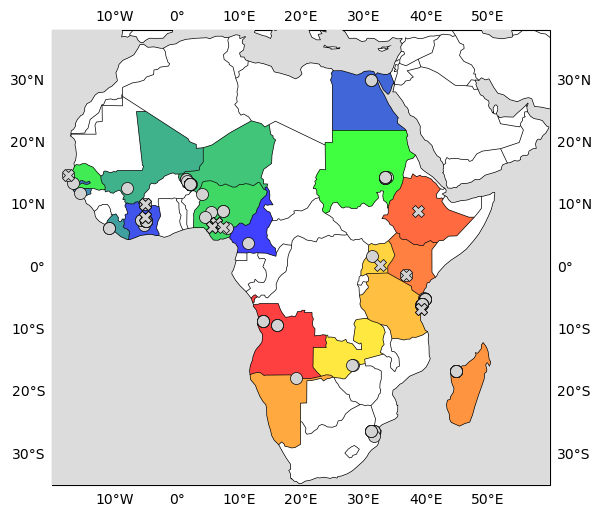

In [78]:
cm = 1 / 2.54

# plot the results
# fig, ax = plt.subplots()
figure(figsize=(17 * cm, 15 * cm))

ax = plt.axes(projection=ccrs.PlateCarree())
m = [markers[species] for species in df["pca_species"]]


for index, row in df.iterrows():
    if row["pca_species"] in ["s_haematobium", "s_bovis"]:
        plt.scatter(
            row["lon"],
            row["lat"],
            marker=row["marker"],
            s=75,
            linewidth=0.5,
            edgecolor="black",
            transform=ccrs.Geodetic(),
            alpha=1,
            zorder=int(row["zorder"]),
            color="lightgrey",
        )


ax.add_feature(cf.OCEAN, facecolor="gainsboro", zorder=4)

ax.coastlines(zorder=2, linewidth=1)
ax.add_feature(cf.BORDERS, edgecolor="black", zorder=4, linewidth=0.5)
ax.gridlines(
    draw_labels=True,
    dms=True,
    x_inline=False,
    y_inline=False,
    zorder=5,
    color="white",
    alpha=0,
)

# Get the cartopy shapefile reader for countries
shapename = "admin_0_countries"
countries_shp = shpreader.natural_earth(
    resolution="110m", category="cultural", name=shapename
)

# Loop through countries and color Niger
for country in shpreader.Reader(countries_shp).records():
    if country.attributes["NAME_LONG"] in cartopy_shading.keys():
        ax.add_geometries(
            [country.geometry],
            ccrs.PlateCarree(),
            facecolor=cartopy_shading[country.attributes["NAME_LONG"]],
            alpha=0.75,
        )


plt.xlim([-20, 60])
plt.ylim([-35, 38])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig("sample_map.png", bbox_inches="tight")
plt.savefig("sample_map.svg", bbox_inches="tight")

# PCA

In [79]:
pca_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")

In [81]:
col_df=pd.read_csv(f"{proj_dir}/data/country_colors.csv", sep=",", header=0)
colors = col_df.set_index('country')['color'].to_dict()
colors

{'angola': '#FF0000',
 'swaziland': '#FF1C00',
 'ethiopia': '#FF3800',
 'kenya': '#FF5500',
 'madagascar': '#FF7100',
 'namibia': '#FF8D00',
 'tanzania': '#FFAA00',
 'uganda': '#FFC600',
 'zambia': '#FFE200',
 'zanzibar': '#FFFF00',
 'cameroon': '#0000FF',
 'cote_d_ivoire': '#0019E5',
 'egypt': '#0033CC',
 'gambia': '#004CB2',
 'guineabissau': '#006699',
 'liberia': '#007F7F',
 'mali': '#009965',
 'niger': '#00B24C',
 'nigeria': '#00CC32',
 'senegal': '#00E519',
 'sudan': '#00FF00',
 'na': '#808080'}

/tmp/ipykernel_24392/799540088.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[1]
/tmp/ipykernel_24392/799540088.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = row[2]


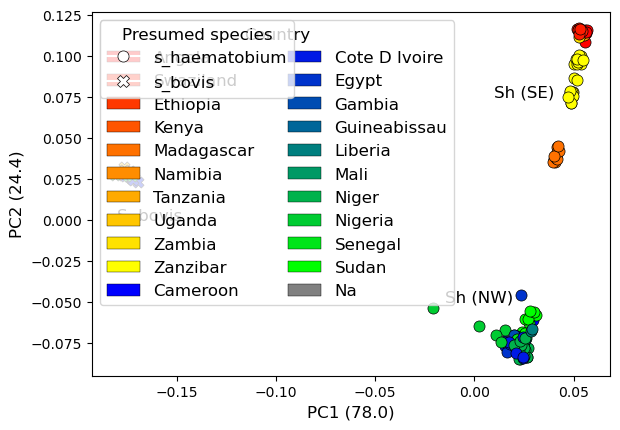

In [82]:
cm = 1 / 2.54

# plot the results
# fig, ax = plt.subplots()
figure(figsize=(17 * cm, 12 * cm))

# figure(figsize=(6,6))
markers = {
    "s_haematobium": "o",
    "s_sp": "v",
    "s_bovis": "X",
    "s_intercalatum": "*",
    "s_guineensis": "P",
    "s_margrebowiei": "D",
    "s_matthei": "s",
}

pca_markers = {"s_haematobium": "o", "s_bovis": "X"}

pca_df = pca_df.sample(frac=1).reset_index(drop=True)
for index, row in pca_df.iterrows():
    if row["pca_species"] in ["s_haematobium", "s_bovis"]:
        x = row[1]
        y = row[2]
        marker = pca_markers[row["pca_species"]]
        color = colors[row["country"]]

        plt.scatter(
            x, y, marker=marker, color=color, edgecolor="black", linewidths=0.5, s=64
        )


# set x label (eigen 1)
eigen_vals = [line.strip() for line in open(f"{results_dir}/pca/pca.eigenval", "r")]

pc1 = eigen_vals[0]
plt.xlabel(f"PC1 ({float(pc1):.1f})", fontsize=12)

# set x label (eigen 2)
pc2 = eigen_vals[1]
plt.ylabel(f"PC2 ({float(pc2):.1f})", fontsize=12)


# make legend for countries
country_patches = []
for country in colors.keys():
    country_patch = mpatches.Patch(
        facecolor=colors[country],
        edgecolor="black",
        label=country.title().replace("_", " "),
        linewidth=0.3,
    )
    country_patches.append(country_patch)


prop = {"size": 8}
# plt.legend(title="Presumed species", handles=[ssp_marker, ssh_marker, ssb_marker], bbox_to_anchor=(1.05, 0.3))
# plt.legend(title="Presumed species", handles=[ssp_marker, ssh_marker, ssb_marker, sg_marker, si_marker, smar_marker, smat_marker], loc='lower right', prop={'size': 8}, edgecolor="black", fancybox=False, shadow=True)


# add kmeans group annotation
plt.annotate("Sh (SE)", xy=(0.010, 0.075), fontsize=12)
plt.annotate("Sh (NW)", xy=(-0.015, -0.05), fontsize=12)
plt.annotate("S. bovis", xy=(-0.18, 0.00), fontsize=12)
# plt.annotate("Outgroups", xy=( -0.18,   0.075), fontsize=12)


# make legend for countries
country_legend = plt.legend(
    title="Country",
    handles=[
        mpatches.Patch(
            facecolor=colors[country],
            edgecolor="black",
            label=country.title().replace("_", " "),
            linewidth=0.3,
        )
        for country in colors.keys()
    ],
    scatterpoints=1,
    fontsize=12,
    title_fontsize=12,
    #bbox_to_anchor=(0.0, -0.2),
    loc="upper left",
    ncol=2,
)

# Create legend handles for species
species_handles = [
    mlines.Line2D(
        [],
        [],
        color="white",
        markeredgecolor="black",
        markerfacecolor="white",
        marker=marker,
        markersize=8,
        markeredgewidth=0.5,
        label=species,
    )
    for species, marker in pca_markers.items()
]

# make legend for species
species_legend = plt.legend(
    title="Presumed species",
    handles=species_handles,
    scatterpoints=1,
    title_fontsize=12,
    fontsize=12,
    #bbox_to_anchor=(0.625, -0.2),
    loc="upper left",
    ncol=1,
)

plt.gca().add_artist(country_legend)
# plt.tight_layout(pad=1)

# save
plt.savefig("pca.png", bbox_inches="tight")
plt.savefig("pca.svg", bbox_inches="tight")

plt.show()
# display
plt.close()

# Image(filename="pca.png")

# Admixture

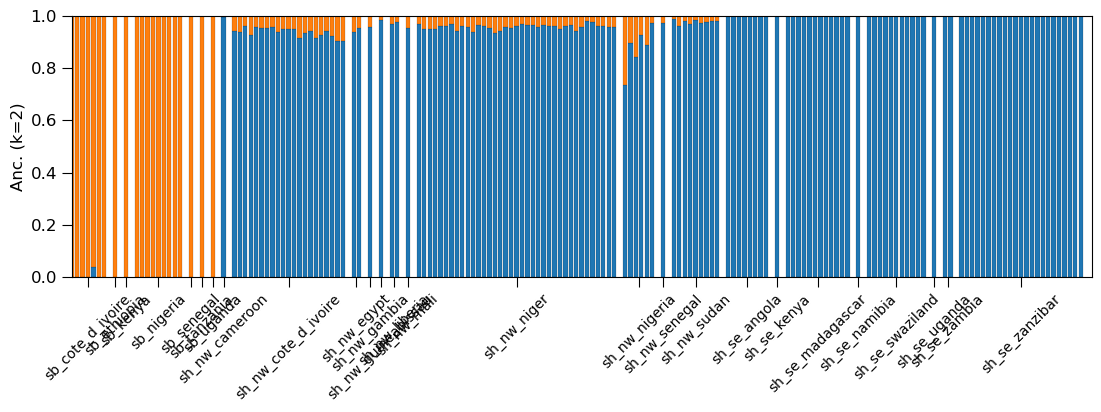

In [85]:
cm = 1 / 2.54  # Conversion factor for centimeters to inches

# Read in sample names
samples = []
with open(f"{results_dir}/admixture/samples.list", "r") as f:
    samples = f.read().splitlines()

# Set the figure size
plt.figure(figsize=(28 * cm, 8 * cm))

# Read admixture data and assign sample names
adm_df = pd.read_csv(f"{results_dir}/admixture/adm.2.Q", sep=" ", header=None)
adm_df["sample_name"] = samples

# Read additional sample information
info_df = pd.read_csv(
    f"{proj_dir}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv", sep=","
)

# Merge admixture data with additional sample information
adm_df = adm_df.merge(info_df, how="left", on="sample_name")

# Read PCA k-means groups and merge with admixture data
pca_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
adm_df = adm_df.merge(
    pca_df[["sample_name", "kmeans_label"]], how="left", on="sample_name"
)

# Sort the dataframe by kmeans_label and country
adm_df = adm_df.sort_values(by=["kmeans_label", "country"])
adm_df = adm_df.reset_index(drop=True)

# Add space between different groups
gap = 1  # Size of the gap between different groups
new_x = []
current_x = 0

group_keys = list(adm_df.groupby(["kmeans_label", "country"]).groups.keys())
group_positions = {}

for key in group_keys:
    group = adm_df[(adm_df["kmeans_label"] == key[0]) & (adm_df["country"] == key[1])]
    group_size = len(group)
    new_x.extend(range(current_x, current_x + group_size))
    group_positions[key] = (current_x + current_x + group_size - 1) / 2
    current_x += group_size + gap

# Initialize bottom for stacking bars
bottom = [0] * len(adm_df)
for p_comp in range(2):  # Loop through the admixture components (k=2)
    plt.bar(new_x, adm_df[p_comp], bottom=bottom, edgecolor="black", linewidth=0.1)
    bottom = list(np.array(bottom) + np.array(adm_df[p_comp]))

# Get xticks and labels for plotting
xticks = list(group_positions.values())
xlabels = [f"{key[0]}_{key[1]}" for key in group_keys]

# Set plot labels and layout
plt.ylabel("Anc. (k=2)", fontsize=12)
plt.tight_layout()
plt.xlim(0, current_x)
plt.ylim(0, 1)
plt.xticks(xticks, labels=xlabels, rotation=45)
plt.yticks(fontsize=12)
plt.tick_params(length=7)

# Optionally save the figure
# plt.savefig("k2.svg")
# plt.savefig("k2.png")

# Show the plot
plt.show()
plt.close()

In [87]:
value_counts_df = adm_df[["host", "country"]].value_counts().reset_index(name='count')

# Create a pivot table with country as index and host as columns
pivot_df = value_counts_df.pivot_table(index='country', columns='host', values='count', fill_value=0)

pivot_df

host,cow,human,na,snail,unk
country,,,,,
angola,0.0,5.0,0.0,3.0,0.0
cameroon,0.0,0.0,1.0,0.0,0.0
cote_d_ivoire,0.0,0.0,1.0,27.0,0.0
egypt,0.0,0.0,2.0,0.0,0.0
ethiopia,0.0,0.0,1.0,0.0,0.0
gambia,0.0,0.0,1.0,0.0,0.0
guineabissau,0.0,0.0,1.0,0.0,0.0
kenya,0.0,0.0,1.0,1.0,0.0
liberia,0.0,1.0,0.0,1.0,0.0


In [88]:
pivot_df.sum(axis=1)

country
angola            8.0
cameroon          1.0
cote_d_ivoire    28.0
egypt             2.0
ethiopia          1.0
gambia            1.0
guineabissau      1.0
kenya             2.0
liberia           2.0
madagascar       12.0
mali              1.0
namibia           1.0
niger            37.0
nigeria          15.0
senegal           2.0
sudan             9.0
swaziland        11.0
tanzania          1.0
uganda            2.0
zambia            2.0
zanzibar         23.0
dtype: float64